<a href="https://colab.research.google.com/github/Julidmz/Data_Inmersion_Alura/blob/main/DATA_INMERSION_AULA_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3

##Profundizando en el análisis exploratorio e insights

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [67]:
columnas = {
    'Baños': 'Banos',
    'Área': 'Area'
}

inmuebles = inmuebles.rename(columns=columnas)

In [68]:
valor = inmuebles.Valor.str.split(expand=True)

inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
5864,Apartamento,Apartamento en venta en Gran America,2,2,48,Gran America,Quinta Paredes,$ 350.000.000,$,350.000.000


In [69]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True) 
inmuebles[['Precio','Barrio']]


,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [70]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

In [71]:
pd.set_option('display.precision',2)
pd.set_option('display.float.format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [72]:
inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Area']
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58


In [73]:
#La clausula groupby es para agrupar, en este caso particular lo agrupamos por barrio, seguido de la funcion mean() para determinar el promedio
inmuebles.groupby('Barrio').mean()

#Calculamos el promedio del precio por metro cuadrado para cada uno de los barrios, solo que si calculamos el promedio de nuestro dataset, estamos calculando una mala metrica para trabajar.

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


In [74]:
#Como solucion: para un barrio especifico sumar todos los inmuebles que pertenecen a dicho barrio y lo vamos a dividir entre la sumatoria de todas las superficies que pertenecen a dicho barrio, recien ahi vamos a calcular el valor especifico del metro cuadrado y no el promedio dado en el calculculo hecho anteriormente.
#Luego vamos a comparar los resultados para ver cual es el comportamiento de uno y del otro.
#Vamos a agrupar por barrio de nuevo, pero ahora en vez de utilizar la funcion mean(), vamos a utilizar la funcion sum().
#Creamos una nueva variable llamada datos_barrio
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [75]:
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


In [76]:
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

In [77]:
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29


In [78]:
top_barrios = inmuebles['Barrio'].value_counts()[:10].index

In [79]:
datos_barrio.reset_index(inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [80]:
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


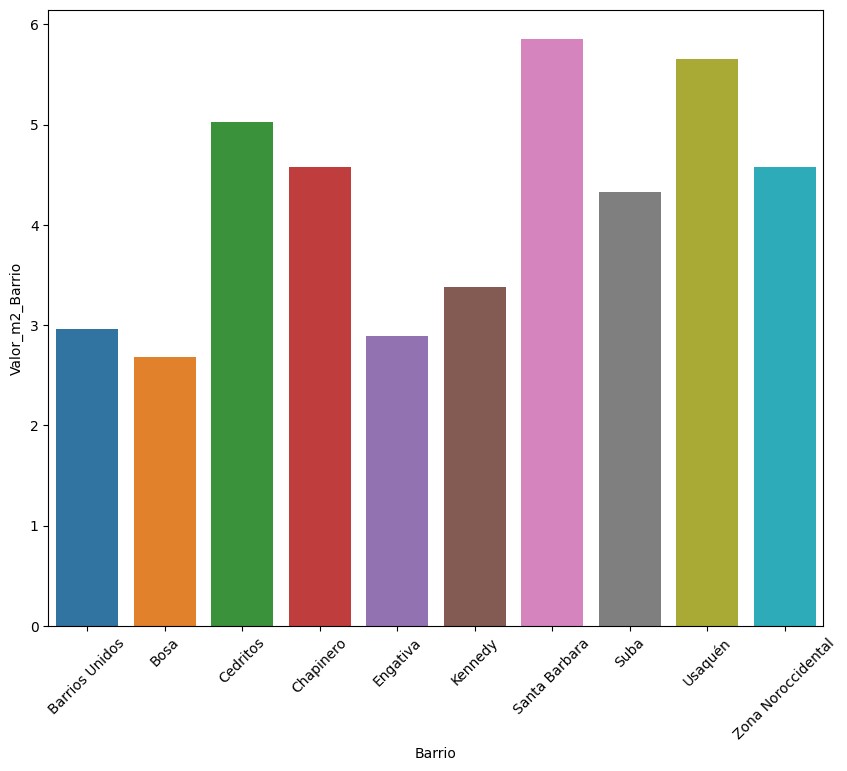

In [81]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Barrio", y="Valor_m2_Barrio", data = datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)


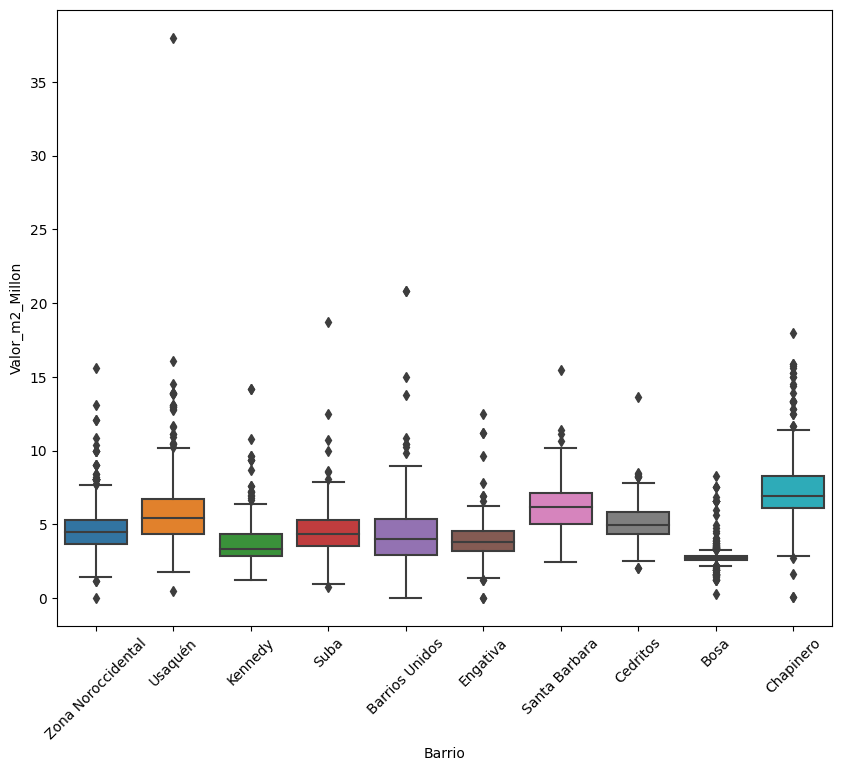

In [82]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Valor_m2_Millon", data=inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)
plt.show()

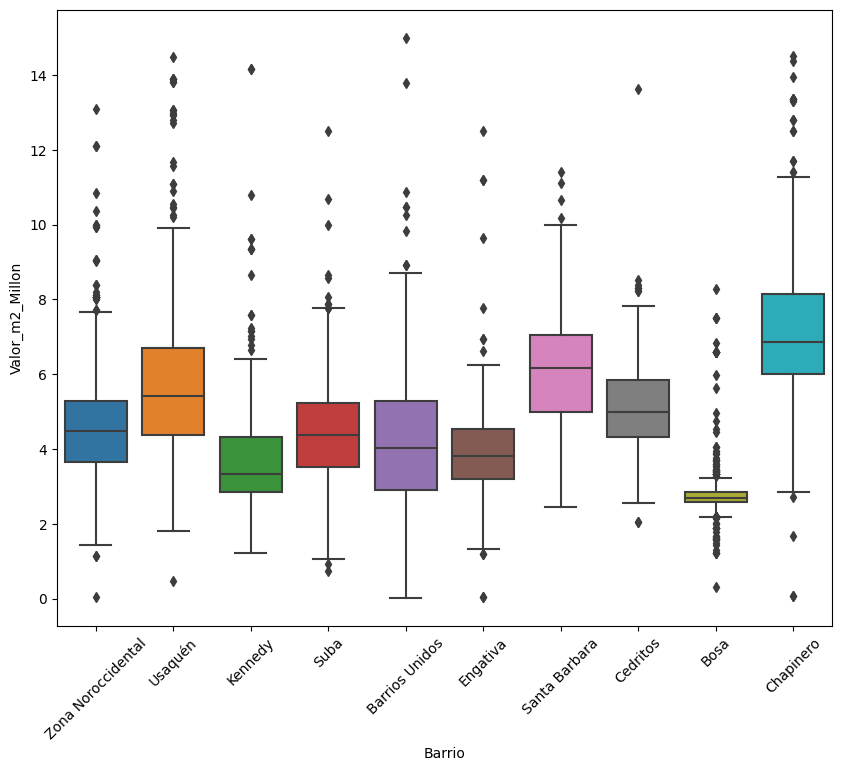

In [83]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Valor_m2_Millon", data=inmuebles.query('Barrio in @top_barrios & Valor_m2_Millon < 15'))
ax.tick_params(axis='x', rotation=45)
plt.show()

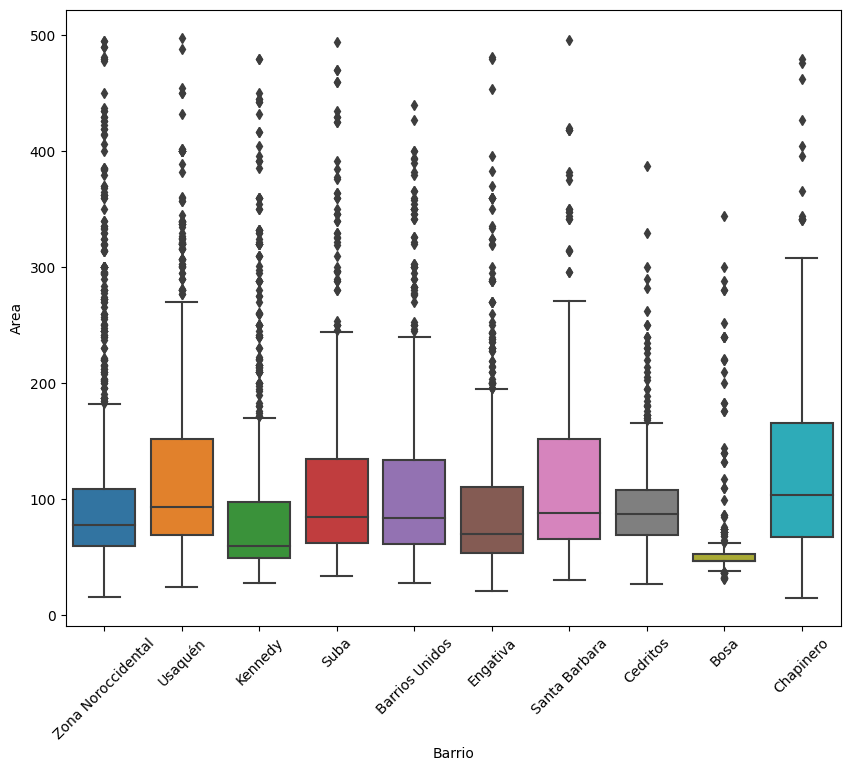

In [84]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Area", data=inmuebles.query('Barrio in @top_barrios & Area < 500'))
ax.tick_params(axis='x', rotation=45)
plt.show()

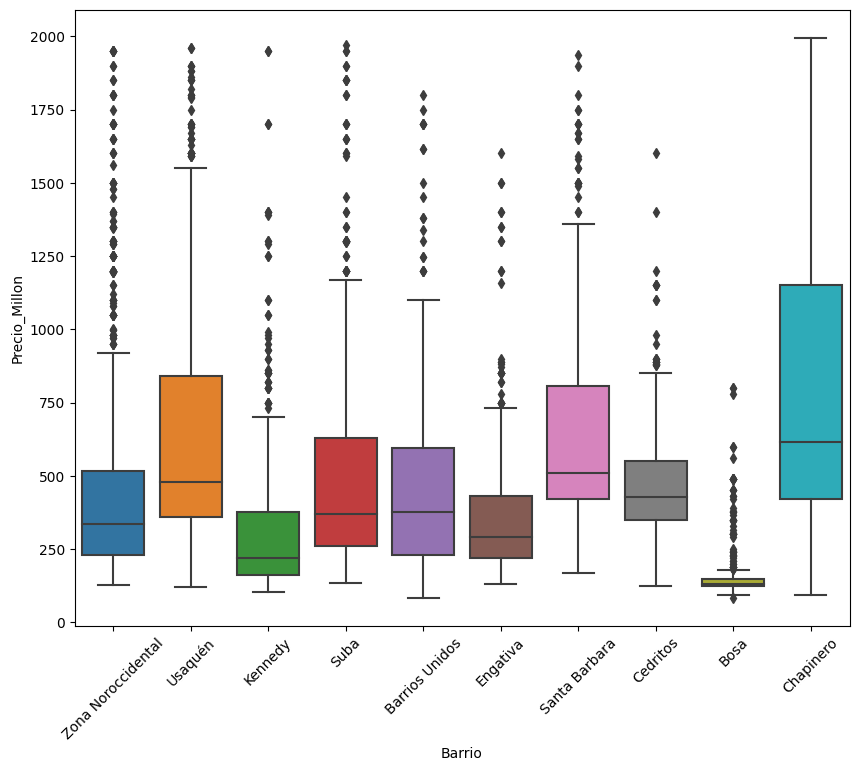

In [85]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Precio_Millon", data = inmuebles.query('Barrio in @top_barrios & Precio_Millon < 2000'))
ax.tick_params(axis='x', rotation=45)
plt.show()

Vamos a traer estos datos estadisticos de la ciudad de Bogotá, directamente del DANE y vamos a ver como estos datos nos ayudarian en inclusión de nuevas variables para el cálculo del precio de los inmuebles en la ciudad de Bogotá.

Encuesta multiproposito de Bogotá para obtener informacion socio-económica y de entorno urbano de los habitantes de Bogotá para la formulacion, seguimiento y evaluación de politicas distritales.

https://microdatos.dane.gov.co/index.php/catalog/743

In [86]:
datos_a = pd.read_csv('/content/drive/MyDrive/Identificación (Capítulo A).csv', sep = ';',  encoding='latin-1')
datos_a.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [87]:
datos_a.shape

(106467, 11)

In [88]:
datos_a = datos_a.loc[datos_a.MPIO == 11001]
datos_a.shape

(86504, 11)

In [89]:
datos_b = pd.read_csv('/content/drive/MyDrive/Datos de la vivenda y su entorno (Capítulo B).csv', sep = ';',  encoding='latin-1')
datos_c = pd.read_csv('/content/drive/MyDrive/Condiciones habitacionales del hogar (Capítulo C).csv', sep = ';',  encoding='latin-1')
datos_e  = pd.read_csv('/content/drive/MyDrive/Composición del hogar y demografía (Capítulo E).csv', sep = ';',  encoding='latin-1')
datos_h = pd.read_csv('/content/drive/MyDrive/Educación (Capítulo H).csv', sep = ';',  encoding='latin-1')
datos_l = pd.read_csv('/content/drive/MyDrive/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv', sep = ';',  encoding='latin-1')
datos_k = pd.read_csv('/content/drive/MyDrive/Fuerza de trabajo (Capítulo K).csv', sep = ';',  encoding='latin-1')

<ipython-input-89-1584ae8890b7>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/Condiciones habitacionales del hogar (Capítulo C).csv', sep = ';',  encoding='latin-1')
<ipython-input-89-1584ae8890b7>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e  = pd.read_csv('/content/drive/MyDrive/Composición del hogar y demografía (Capítulo E).csv', sep = ';',  encoding='latin-1')
<ipython-input-89-1584ae8890b7>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/Educación (Capítulo H).csv', sep = ';',  encoding='latin-1')
<ipython-input-89-1584ae8890b7>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_l = pd.read_csv('/content/dri

In [90]:
datos_dane = pd.merge(datos_a,datos_b, on='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

In [91]:
datos_dane = pd.merge(datos_dane,datos_c, on='DIRECTORIO', how='left')
datos_dane.shape

(87061, 214)

In [92]:
datos_dane = pd.merge(datos_dane,datos_e, on='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-92-9f757f86689d>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane,datos_e, on='DIRECTORIO', how='left')


(238559, 281)

In [93]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


Al estar haciendo demasiados merge, el consumo de memoria aumenta y podemos caer en la generación de BIG DATA

#Desafío

##Dar un vistazo a la base de datos del DANE, entender estas variables conceptualmente para entender mejor el contexto de esta base.

##Organizar tu notebook para que tu proyecto quede mejor presentado. (LISTO)

Entendiendo la base de datos...

Capítulo A: Contiene información sobre las variables de identificación de la encuesta: Departamento, municipio, clase, localidad (si es Bogotá), segmento, entre otros datos.

Capítulo B: Información relacionada con la calidad del entorno de la vivienda, así como vías de acceso e iluminación de estas. Características y condiciones habitacionales de la vivienda. Información acerca si la vivienda es afectada por problemas estructurales y de ubicación. Información acerca del riesgo de las viviendas ante problemas ambientales dada la ubicación cerca de focos de afectación como: fábricas, basureros, bares etc. Cobertura de los servicios públicos domiciliarios.

Capítulo C: Este capítulo contiene información acerca de los hogares que tienen vivienda propia, hogares arrendatarios y los que habitan la vivienda en otra condición (usufructo, posesión sin título, ocupante de hecho). Información sobre el monto de los gastos en que incurre el hogar para tener el derecho de habitar la vivienda, como son los pagos por arriendo y la cuota de administración o celaduría. Información sobre las fuentes de financiación que usan los hogares para la compra de vivienda. Información sobre la calidad de la vivienda en términos de los espacios y las características de los servicios y equipamientos de los que dispone. Información con respecto a los subsidios para vivienda otorgados por el gobierno u otra institución. Información sobre los hogares que clasifican las basuras y los hogares que realizan prácticas para reducir el consumo de agua y energía.

Capítulo e: Información básica sobre el tamaño, distribución y dinámica demográfica de la población en Bogotá y los municipios seleccionados. Características socio-demográficas de la población residente en Bogotá y los municipios seleccionados. Personas que conforman el hogar y el núcleo familiar correspondiente al jefe/a del hogar. Información sobre migración de largo y corto plazo, así como entre áreas urbanas y rurales y entre barrios o veredas.

Capítulo h: Principales características educativas de la población de 5 años y más: alfabetismo, asistencia escolar, niveles alcanzados y años de estudio.Información acerca de las razones de no asistencia de la población en edad escolar.Información acerca del medio de transporte y el tiempo utilizado en el desplazamiento al establecimiento educativo. Información acerca de subsidios, becas y créditos educativos, así como las entidades que los otorgan. Gasto de los hogares en educación. Información acerca de la persona con quien permanecen los menores entre 5 y 17 años.

Capítulo k: Información sobre la actividad económica de la población de Bogotá y los municipios seleccionados de Cundinamarca. Información acerca de las personas dentro del hogar que devengan ingresos y si estos ingresos provienen de su vinculación al mercado laboral o de otras actividades o transferencias. Información sobre las condiciones de trabajo de los ocupados, como son el acceso a la seguridad social, horas trabajadas, ingresos, empleo secundario. De este capítulo se puede caracterizar las personas desocupadas e inactivas, determinando si perciben ingresos por otras fuentes como ayudas de familiares, amigos o instituciones. Información sobre el tiempo empleado en actividades no remuneradas, con enfoque de género. Información sobre teletrabajo y trabajo en casa en los últimos 12 meses y si el motivo de esta modalidad de trabajo fue la pandemia del COVID-19.

Capítulo l: Información sobre eventos destacados que afectan las condiciones de vida de los hogares y sobre la victimización de que han sido objeto sus miembros frente a agresiones criminales durante los últimos 12 meses. La información permite conocer la percepción sobre los cambios y estado actual en los equipamientos urbanos, en el medio ambiente, en algunos campos de desempeño institucional de la administración pública y en la igualdad de oportunidades de grupos poblacionales vulnerables. Información de los hogares beneficiarios de subsidios del gobierno nacional, departamental o municipal.

In [94]:
datos_a.head(3)

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"


In [95]:
datos_b.head(3)

,DIRECTORIO,NVCBP1,NVCBP2,NVCBP3,NVCBP4,NVCBP5,NVCBP6,NVCBP7,NVCBP8A,NVCBP8B,...,NVCBP15J,NVCBP15K,NVCBP15L,NVCBP15M,NVCBP16A1,NVCBP16A2,NVCBP16A3,NVCBP16A4,NVCBP16,FEX_C
0,3005117.00,4,1.00,1,1,1,12,1.00,2,2,...,2,2,2,2,1,1,1,1,1,"19,5771388808791"
1,3005118.00,2,1.00,1,2,1,5,2.00,2,2,...,2,2,2,2,1,1,1,1,1,"11,3314401226775"
2,3005119.00,1,NaN,1,2,1,1,NaN,2,2,...,2,2,2,2,2,2,2,2,1,"5,67151636864259"


In [96]:
datos_c.head(3)

,DIRECTORIO,DIRECTORIO_HOG,SECUENCIA_P,NHCCP1,NHCCP2,NHCCP3,NHCCP4A,NHCCP4B,NHCCP4C,NHCCP4D,...,NHCCP46J,NHCCP46K,NHCCP46L,NHCCP46M,NHCCP47A,NHCCP47A1,NHCCP47B,NHCCP47B1,NHCCP47C,FEX_C
0,1165355.00,11653551,1,2,1e+06,1.00,1.00,NaN,NaN,NaN,...,30.00,15.00,5.00,60.00,2,NaN,2,NaN,2,"47,6106272985279"
1,1165356.00,11653561,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,30.00,15.00,5.00,60.00,2,NaN,2,NaN,2,"51,0122773592785"
2,1165357.00,11653571,1,1,NaN,1.00,1.00,NaN,NaN,NaN,...,30.00,14.00,5.00,15.00,2,NaN,2,NaN,2,"45,950197007885"


In [97]:
datos_e.head(3)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,SECUENCIA_P,ORDEN,NPCEP4,NPCEP_5,NPCEP5,SEXO,NPCEP6,...,NPCEP22A,NPCEP24,NPCEP24A,NPCEP25,NPCEP25A,NPCEP27,NPCEP26,NPCEP29,NPCEP29A,FEX_C
0,166238.00,1662381,16623811,1,1,70,3,2,2,1,...,NaN,3,NaN,1.00,2.00,1.00,1.00,NaN,NaN,"1,69849246231156"
1,166238.00,1662381,16623812,1,2,78,3,1,1,2,...,NaN,3,NaN,99.00,NaN,1.00,1.00,NaN,NaN,"1,69849246231156"
2,220102.00,2201021,22010211,1,1,45,3,1,1,1,...,1.00,2,NaN,10.00,NaN,1.00,1.00,NaN,NaN,"6,74441212899351"


In [98]:
datos_h.head(3)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,SECUENCIA_P,ORDEN,NPCHP1,NPCHP2,NPCHP3,NPCHP4,NPCHP4A,...,NPCHP35D,NPCHP35E,NPCHP35F,NPCHP35I,NPCHP35J,NPCHP35K,NPCHP36,NPCHP36A,NPCHP37,FEX_C
0,166238.00,1662381,16623811,1,1,1,2,NaN,3.00,3.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2,NaN,NaN,"1,69849246231156"
1,166238.00,1662381,16623812,1,2,2,2,NaN,1.00,NaN,...,2.00,2.00,2.00,2.00,2.00,2.00,2,NaN,NaN,"1,69849246231156"
2,220102.00,2201021,22010211,1,1,1,2,NaN,3.00,5.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2,NaN,NaN,"6,74441212899351"


In [99]:
datos_k.head(3)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,SECUENCIA_P,ORDEN,NPCKP1,NPCKP2,NPCKP3,NPCKP4,NPCKP5,...,DES,FL,FFL,PET_DEFA,OCU_DEFA,DES_DEFA,INI_DEFA,PEA_DEFA,OINFORMAL,FEX_C
0,166238.00,1662381,16623811,1,1,4,2.00,2.00,2.00,2.00,...,0,0,1,1,0,0,1,0,NaN,"1,69849246231156"
1,166238.00,1662381,16623812,1,2,4,2.00,2.00,2.00,2.00,...,0,0,1,1,0,0,1,0,NaN,"1,69849246231156"
2,220102.00,2201021,22010214,1,4,3,2.00,2.00,2.00,2.00,...,0,0,0,1,0,0,1,0,NaN,"6,74441212899351"


In [100]:
datos_l.head(3)

,DIRECTORIO,DIRECTORIO_HOG,SECUENCIA_P,NHCLP1,NHCLP2A,NHCLP2B,NHCLP2C,NHCLP2D,NHCLP2E,NHCLP2AA,...,NHCLP31AA,NHCLP31AB,NHCLP31AC,NHCLP31BA,NHCLP31BB,NHCLP31BC,NHCLP31CA,NHCLP31CB,NHCLP31CC,FEX_C
0,1165355.00,11653551,1,1,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"47,6106272985279"
1,1165356.00,11653561,1,1,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"51,0122773592785"
2,1165357.00,11653571,1,1,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"45,950197007885"


##Atributos que relacionan a las tablas

* Todas: DIRECTORIO (dentificador numérico de vivienda)

#Aula 4

##Cruzando bases y Machine Learning

In [101]:
datos_dane = pd.read_csv('/content/drive/MyDrive/datos_dane.csv')

In [102]:
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [103]:
datos_dane.shape

(9857, 55)

In [104]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [105]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [106]:
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94


In [107]:
datos = datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.00,1.00,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.00,1.00,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.00,1.00,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.00,1.00,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.00,1.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.00,1.00,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.00,1.00,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.00,1.00,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.00,1.00,0,1,0


In [108]:
datos.NOMBRE_ESTRATO.value_counts()

Niza                                                   243
SUBA: La Academia + Guaymaral + San José de Bavaria    212
CHAPINERO: Chicó Lago + El Refugio                     210
Los Libertadores                                       208
Modelia                                                205
                                                      ... 
Tunjuelito                                              26
Lourdes                                                 25
Localidad Chapinero resto                               21
Localidad Usaquén resto                                 10
Localidad Santa Fe resto                                 8
Name: NOMBRE_ESTRATO, Length: 102, dtype: int64

In [109]:
datos.loc[datos.NOMBRE_ESTRATO == '20 de Julio']

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.00,1.00,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.00,1.00,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.00,1.00,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.00,1.00,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.00,1.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.00,1.00,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.00,1.00,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.00,1.00,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.00,1.00,0,0,1


In [110]:
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06


In [111]:
pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')  

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')  
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Moneda                    9520 non-null   object 
 9   Precio                    9520 non-null   object 
 10  Precio_Millon             9520 non-null   float64
 11  Valor_m2_Millon           9520 non-null   float64
 12  Valor_m2_Barrio           9520 non-null   float64
 13  CONJUNTO_CERRADO          28 non-null     float64
 14  INSEGURI

In [113]:
upz = pd.read_csv('/content/drive/MyDrive/cod_upz.csv')
upz.head

<bound method NDFrame.head of                             NOMBRE_ESTRATO  COD_UPZ_GRUPO
0   SANTA FE: Las Nieves + Sagrado Corazón         814.00
1                             Santa Isabel          37.00
2    USAQUÉN: Country Club + Santa Bárbara         803.00
3       CHAPINERO: Pardo Rubio + Chapinero         816.00
4                Ciudad Salitre Occidental         110.00
..                                     ...            ...
90                                Verbenal           9.00
91                        Casa Blanca Suba          23.00
92                                El Prado          19.00
93                                    Muzú          41.00
94       USME: Parque Entrenubes + Danubio         812.00

[95 rows x 2 columns]>

In [114]:
datos_ml = pd.merge(datos_ml,upz,left_on='UPZ', right_on='NOMBRE_ESTRATO', how='inner')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [115]:
datos_ml.shape

(9318, 26)

In [116]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Moneda                    9318 non-null   object 
 9   Precio                    9318 non-null   object 
 10  Precio_Millon             9318 non-null   float64
 11  Valor_m2_Millon           9318 non-null   float64
 12  Valor_m2_Barrio           9318 non-null   float64
 13  CONJUNTO_CERRADO          28 non-null     float64
 14  INSEGURI

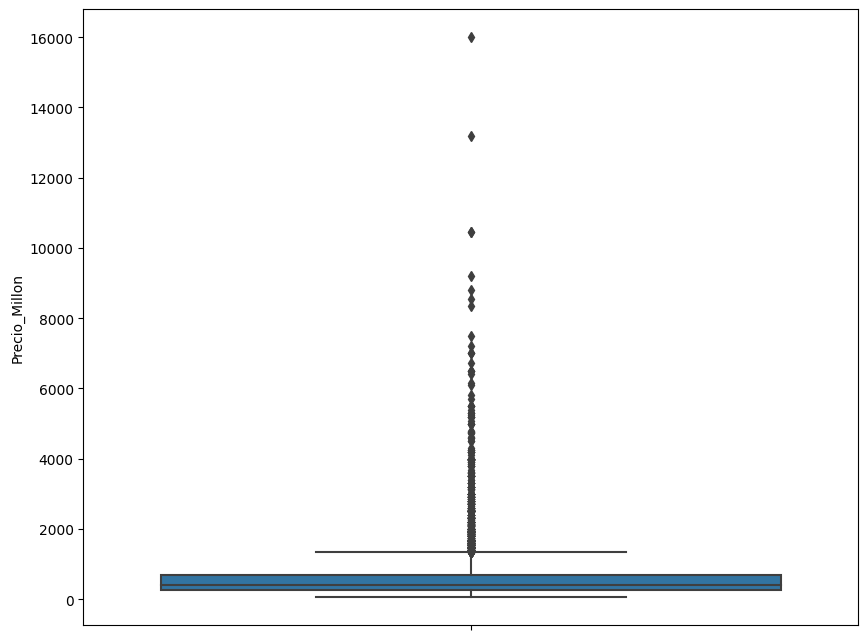

In [117]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

In [118]:
datos_ml.query('Precio_Millon > 5000 | Precio_Millon < 60')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
207,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 8.550.000.000,$,8550000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
323,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
702,Casa,Casa en venta en Chapinero,4,4,462,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.200.000.000,$,5200000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
708,Casa,Casa en venta en Chapinero,12,2,769,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 6.160.000.000,$,6160000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
829,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 7.200.000.000,$,7200000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
1371,Apartamento,Apartamento en venta en El Chicó,4,5,555,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 6.100.000.000,$,6100000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Chicó Lago + El Refugio,817.00
1414,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000,$,13200000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Chicó Lago + El Refugio,817.00
1429,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Chicó Lago + El Refugio,817.00
1442,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Chicó Lago + El Refugio,817.00
1518,Apartamento,Apartamento en venta en Chico Reservado,4,5,378,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 6.500.000.000,$,6500000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Chicó Lago + El Refugio,817.00


In [119]:
datos_ml = datos_ml.query('Precio_Millon < 5000 & Precio_Millon > 60')
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAPINERO: Pardo Rubio + Chapinero,816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verbenal,9.00
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verbenal,9.00
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verbenal,9.00
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verbenal,9.00


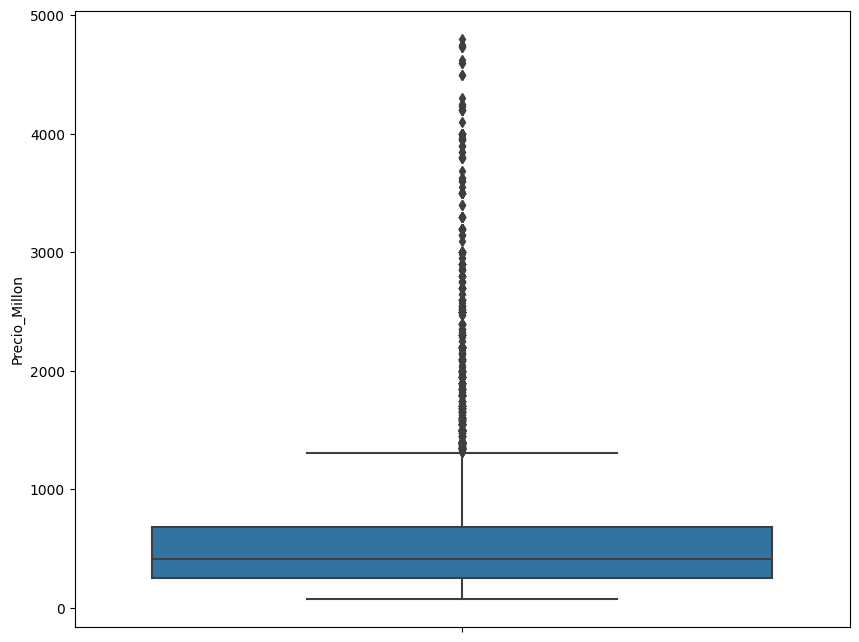

In [120]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

In [121]:
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000
datos_ml['SALARIO_ANUAL_MI']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9313   NaN
9314   NaN
9315   NaN
9316   NaN
9317   NaN
Name: SALARIO_ANUAL_MI, Length: 9277, dtype: float64

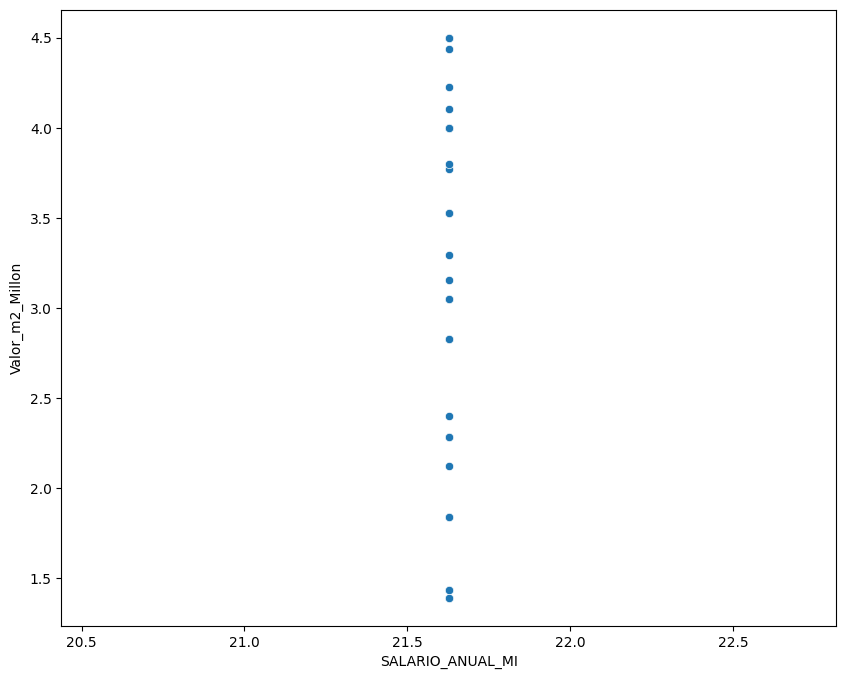

In [122]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI', y = 'Valor_m2_Millon')
plt.show()

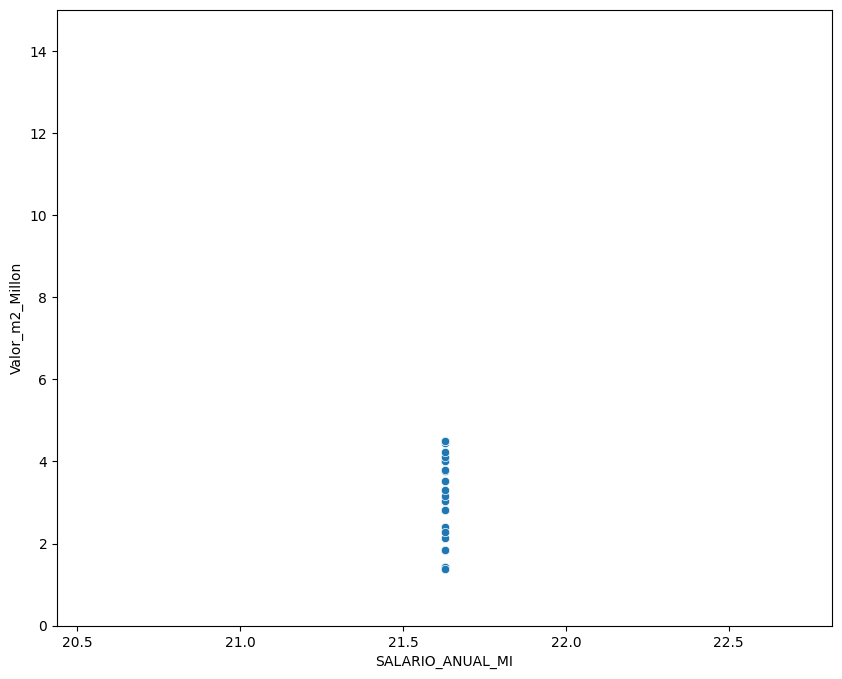

In [123]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI', y = 'Valor_m2_Millon')
plt.ylim((0,15))
plt.show()

In [124]:
datos_ml.corr()

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.00,0.48,0.03,0.22,-0.23,-0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.09,NaN
Banos,0.48,1.00,0.06,0.65,0.08,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN
Area,0.03,0.06,1.00,0.05,-0.04,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.00,NaN
Precio_Millon,0.22,0.65,0.05,1.00,0.41,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN
Valor_m2_Millon,-0.23,0.08,-0.04,0.41,1.00,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,NaN
Valor_m2_Barrio,-0.18,0.16,-0.03,0.32,0.50,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,NaN
CONJUNTO_CERRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSEGURIDAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TERMINALES_BUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BARES_DISCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


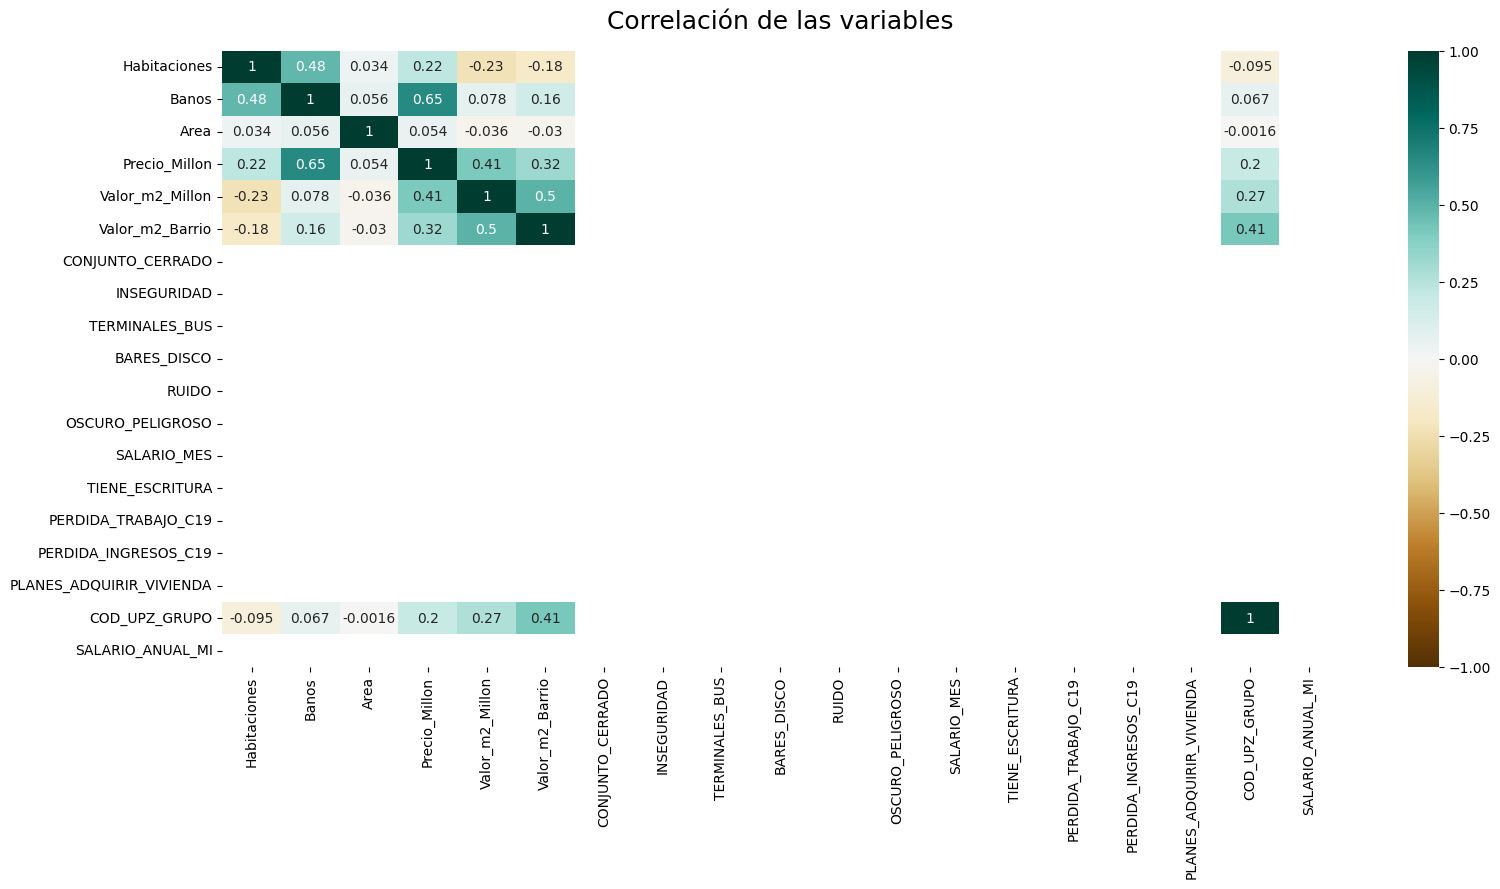

In [125]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = datos_ml[['COD_UPZ_GRUPO']]
y = datos_ml[['Precio_Millon']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=99)

In [129]:
X_train

,COD_UPZ_GRUPO
7578,810.00
8345,98.00
1246,816.00
8491,809.00
4602,47.00
...,...
5223,19.00
7929,85.00
1784,817.00
3268,14.00


In [130]:
X_test

,COD_UPZ_GRUPO
8428,809.00
3079,14.00
6927,75.00
6861,75.00
2357,14.00
...,...
7777,85.00
1423,817.00
3916,803.00
8305,98.00


In [131]:
y_train

,Precio_Millon
7578,550.00
8345,700.00
1246,710.00
8491,400.00
4602,650.00
...,...
5223,360.00
7929,119.00
1784,650.00
3268,350.00


In [132]:
y_test

,Precio_Millon
8428,650.00
3079,550.00
6927,327.00
6861,260.00
2357,460.00
...,...
7777,131.00
1423,695.00
3916,1000.00
8305,1100.00


In [133]:
modelo = LinearRegression()

In [135]:
modelo.fit(X_train,y_train)

LinearRegression()

In [136]:
y_predict_test = modelo.predict(X_test)

In [137]:
from sklearn.metrics import mean_absolute_error, r2_score

In [138]:
baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_mae

349.01934464671155

In [140]:
baseline_r2 = r2_score(y_test, y_predict_test)
baseline_r2

0.025479229587150987

In [148]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos']] #,'CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA'

y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

241.7714514560005 0.39346598615451067
243.29145256483525 0.47023870196651907
